## Preprocessing: Data Cleaning & EDA

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

In [83]:
df = pd.read_csv('data/renting.csv')

### 1. Cleaning the data

Removing duplicated rows:

In [84]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f'Dropped {num_rows - df.shape[0]} duplicate rows')

Dropped 2303 duplicate rows


Removing non-useful columns:

In [85]:
df.drop('_id', axis=1, inplace=True)
df.drop('Deposit', axis=1, inplace=True)
df.drop('Useful square meters', axis=1, inplace=True)
df.drop('Orientation', axis=1, inplace=True)
df.drop('Real state', axis=1, inplace=True)

In [86]:
print("Number of rows of the column 'Plot square meters' with NaN values: ", df['Plot square meters'].isna().sum())

Number of rows of the column 'Plot square meters' with NaN values:  8086


Plot square meters has a great number of NaN as it's only valuable for houses, not for apartments. Therefore, we'll fill with 0s the NaN values. This will also be useful to distinct between houses and apartments.

In [87]:
df['Plot square meters'].fillna(0, inplace=True)

Check what are the columns with the most NaN values:

In [88]:
df.isna().sum()

Title                     0
Description              96
Price                     0
Type                      1
Built square meters       0
Plot square meters        0
Rooms                     0
Bathrooms                 0
Storage room              0
Wardrobe                  0
Furnished                 0
Equipped kitchen          0
Renovation                0
Reduced mobility          0
Heating                   0
Garage                    0
Floor                   930
Elevator                  0
Air conditioning          0
Swimming pool             0
Garden                    0
Green areas               0
Terrace                   0
Consumption            4201
Emissions              4786
Location                  0
dtype: int64

Drop the row that has a NaN value in the column 'Type':

In [89]:
df.dropna(subset=['Type'], inplace=True)

Show a bar plot where each X axis value is a value from the 'Type' column and the Y axis is the number of samples that have NaN in the 'Floor' column:

<Axes: xlabel='Type'>

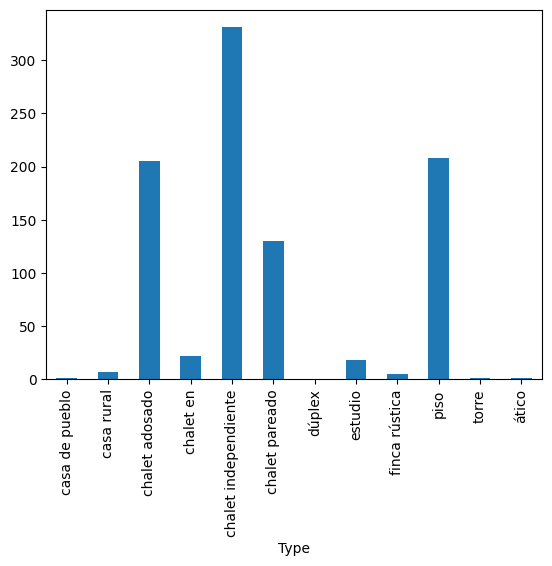

In [90]:
df['Floor'].isna().groupby(df['Type']).sum().plot(kind='bar')

Therefore, we will remove the rows that have NaN in the 'Floor' column and the value 'piso' in the 'Type' column:

In [91]:
df.drop(df[(df['Floor'].isna()) & (df['Type'] == 'piso')].index, inplace=True)

Now, we're sure that there are no apartments with NaN values in the 'Floor' column. So, for the rest of the NaN values in the 'Floor' column, we will replace them with the value 'no aplica':

In [92]:
df['Floor'].fillna('no aplica', inplace=True)

Print the number of rows where the columns 'Consumption' and 'Emissions' have NaN values at the same time:

In [93]:
# Print the number of rows where the columns 'Consumption' and 'Emissions' have NaN values at the same time
print("Number of rows with NaN values in the columns 'Consumption' and 'Emissions': ", df[(df['Consumption'].isna()) & (df['Emissions'].isna())].shape[0])

Number of rows with NaN values in the columns 'Consumption' and 'Emissions':  4152


Therefore, we will remove the columns 'Consumption' and 'Emissions':

In [94]:
df.drop('Consumption', axis=1, inplace=True)
df.drop('Emissions', axis=1, inplace=True)

Finally, we're going to join the columns 'Title' and 'Description' into one column called 'Description' to avoid data sparsity:

In [95]:
df['Description'] = df.apply(lambda x: x['Title'] if pd.isna(x['Description']) else x['Title'] + '. ' + x['Description'], axis=1)
df.drop('Title', axis=1, inplace=True)

In [96]:
df.isna().sum()

Description            0
Price                  0
Type                   0
Built square meters    0
Plot square meters     0
Rooms                  0
Bathrooms              0
Storage room           0
Wardrobe               0
Furnished              0
Equipped kitchen       0
Renovation             0
Reduced mobility       0
Heating                0
Garage                 0
Floor                  0
Elevator               0
Air conditioning       0
Swimming pool          0
Garden                 0
Green areas            0
Terrace                0
Location               0
dtype: int64

Now remove the samples that are in English:

And remove the values of 'Type' that are not necessary:

### 2. Exploratory Data Analysis

### 3. Exporting the data

In [ ]:
df.to_csv('data/preprocessed_data.csv')